# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# <font color = 'red'> Step 1 

### Importing data

In [2]:
df = pd.read_csv('/Users/rahul/Desktop/excelr/Data Science Assignments/Simple_Linear_Regression/delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# <font color = 'red'> Step 2

### Performing EDA On Data

#### Renaming columns

In [3]:
df1 = df.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'}, axis = 1)
df1

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


### Checking Datatype

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


### Checking for Null Values

In [6]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

### Checking for Duplicate Values

In [7]:
df[df.duplicated()].shape

(0, 2)

In [8]:
df[df.duplicated()]

,Delivery Time,Sorting Time


# <font color = 'red'> Step 3

### Plotting the data to check for outliers

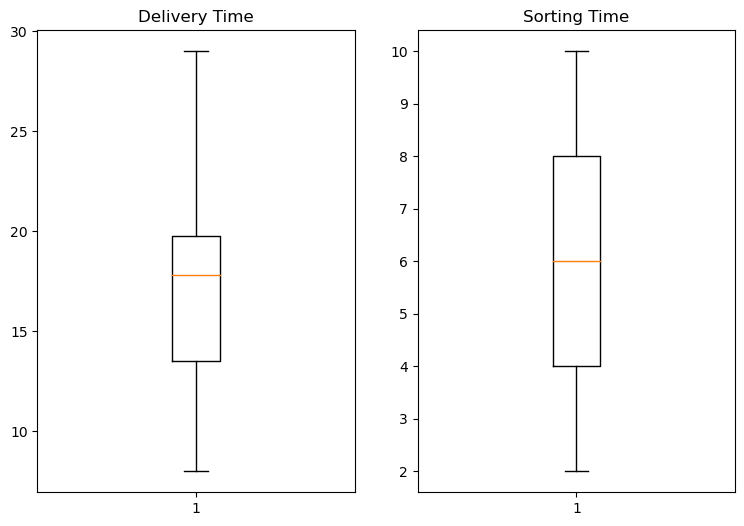

In [9]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(df['Delivery Time'])
plt.title('Delivery Time')
plt.subplot(122)
plt.boxplot(df['Sorting Time'])
plt.title('Sorting Time')
plt.show()

## <font color='red'> As you can see there are no Outliers in the data 

# <font color = 'red'> Step 4

### Checking the Correlation between variables

In [10]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


### Visualization of Correlation beteen x and y
### regplot = regression plot

<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

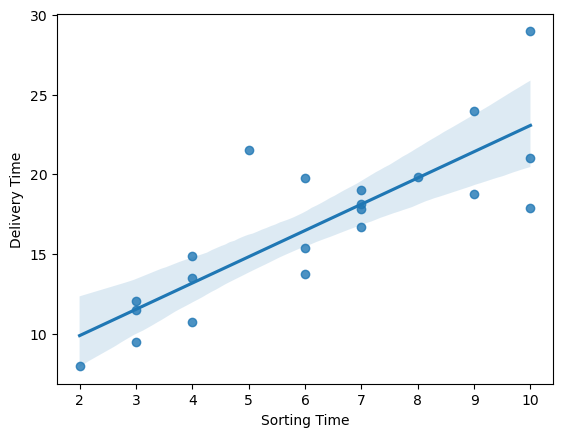

In [11]:
sns.regplot(x=df['Sorting Time'],y=df['Delivery Time'])  

## <font color='red'>As you can see above 
+ There is good correlation between the two variable.
+ The score is more than 0.8 which is a good sign

# <font color = 'red'> Step 5

### Checking for Homoscedasticity or Hetroscedasticity

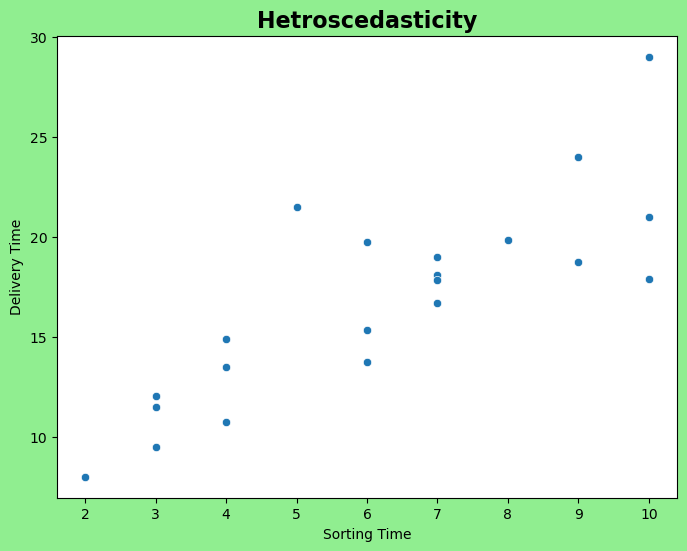

In [12]:
plt.figure(figsize = (8,6), facecolor = 'lightgreen')
sns.scatterplot(x = df['Sorting Time'], y = df['Delivery Time'])
plt.title('Hetroscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

In [13]:
df.var()

Delivery Time    25.754619
Sorting Time      6.461905
dtype: float64

## <font color='red'>As you can see in above graph 
+ It shows as the Sorting Time Increases Delivery Time also increases with much variation along the way 
+ The data doesn't have any specific pattern in the variation, but we can't say the variation is homoscedasticity.

# <font color = 'red'> Step 6

## Feature Engineering

### Trying different transformation of data to estimate normal distribution and to remove any skewness

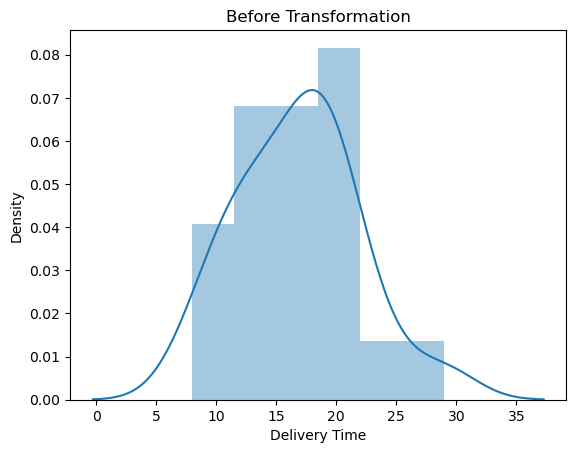

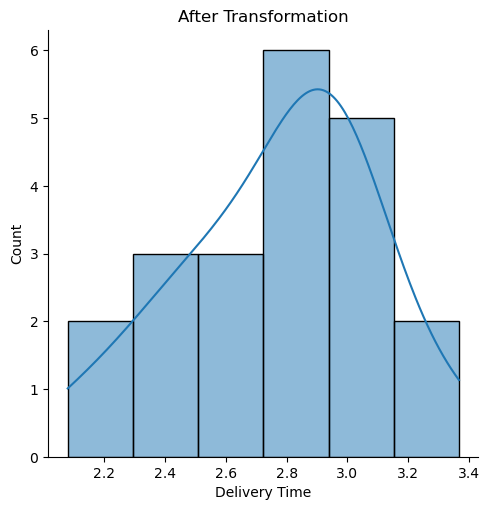

In [14]:
sns.distplot(df['Delivery Time'], bins = 6, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(df['Delivery Time']), bins = 6, kde = True)
plt.title('After Transformation')
plt.show()

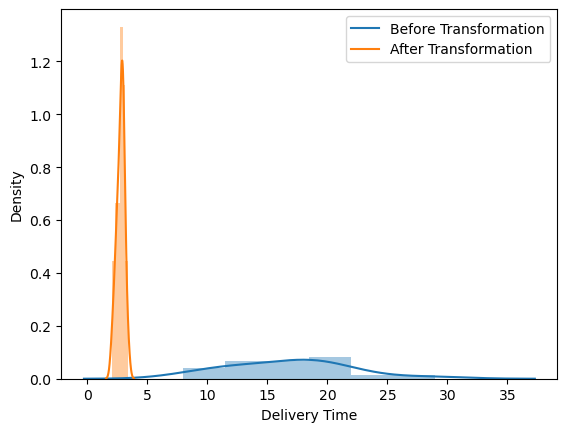

In [15]:
labels = ['Before Transformation','After Transformation']
sns.distplot(df['Delivery Time'], bins = 6, kde = True)
sns.distplot(np.log(df['Delivery Time']), bins = 6, kde = True)
plt.legend(labels)
plt.show()

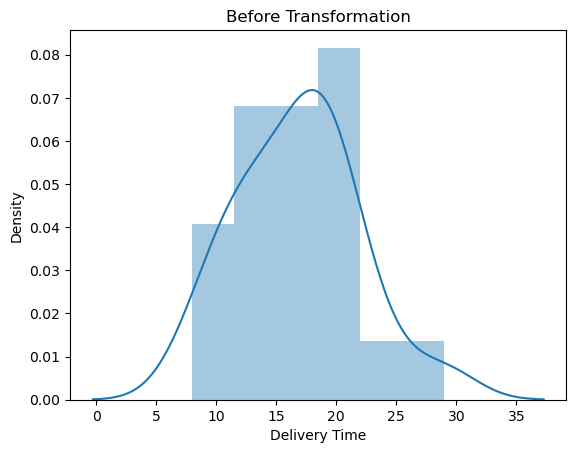

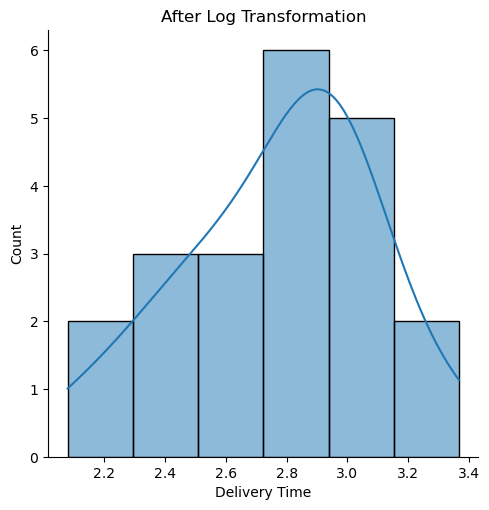

In [16]:
sns.distplot(df['Delivery Time'], bins = 6, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(df['Delivery Time']), bins = 6, kde = True)
plt.title('After Log Transformation')
plt.show()

## <font color='red'> As you can see 
+ How log transformation affects the data and it scales the values down.
+ Before prediction it is necessary to reverse scaled the values, even for calculating RMSE for the models.(Errors)

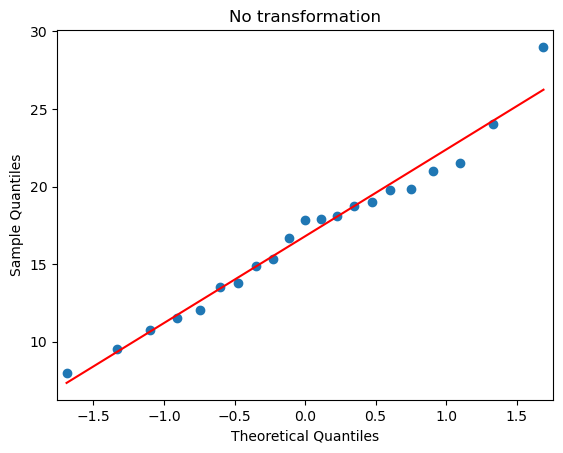

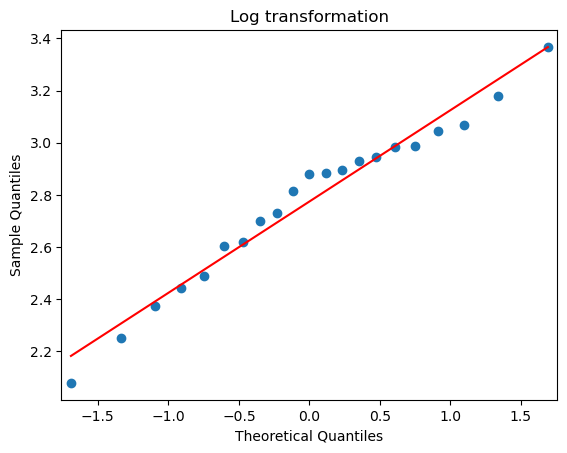

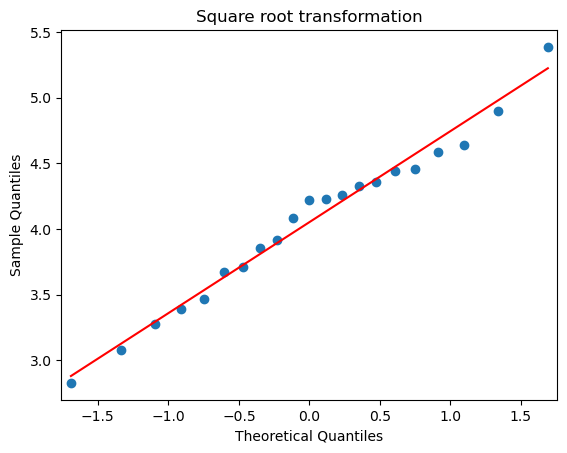

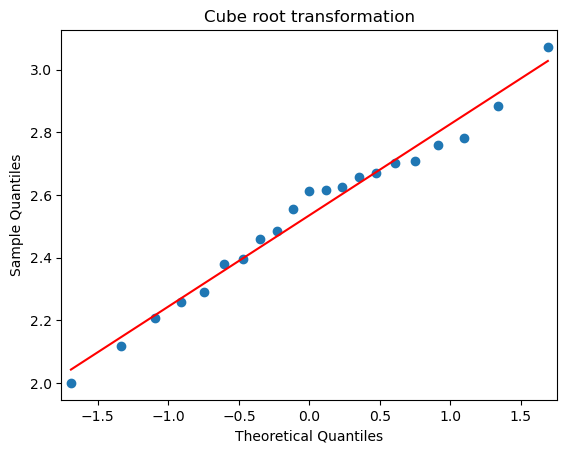

In [17]:
smf.qqplot(df['Delivery Time'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(df['Delivery Time']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(df['Delivery Time']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(df['Delivery Time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

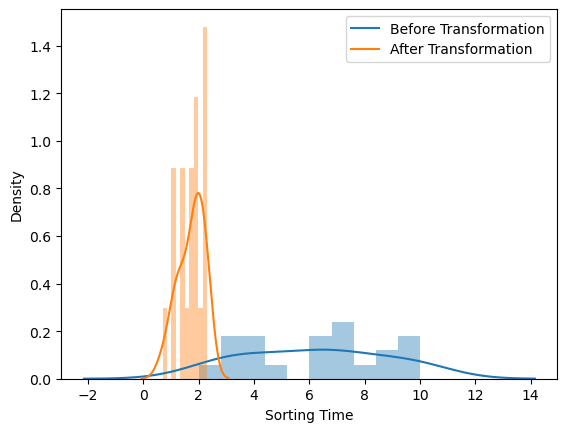

In [18]:
labels = ['Before Transformation','After Transformation']
sns.distplot(df['Sorting Time'], bins = 10, kde = True)
sns.distplot(np.log(df['Sorting Time']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

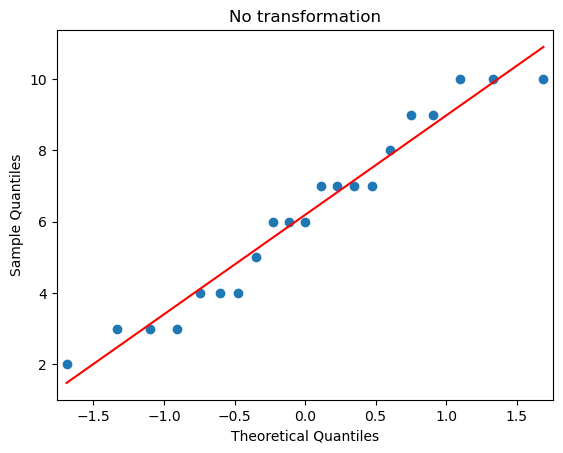

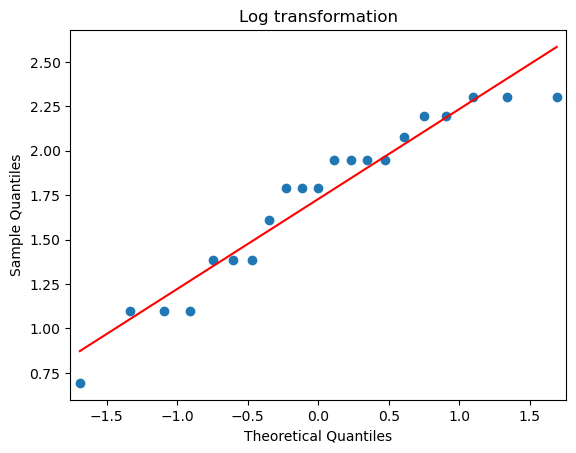

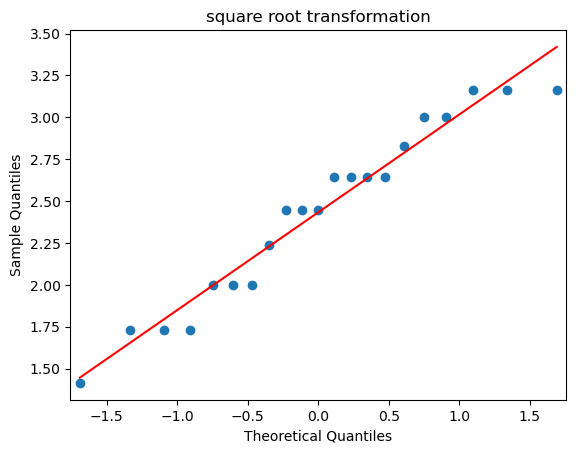

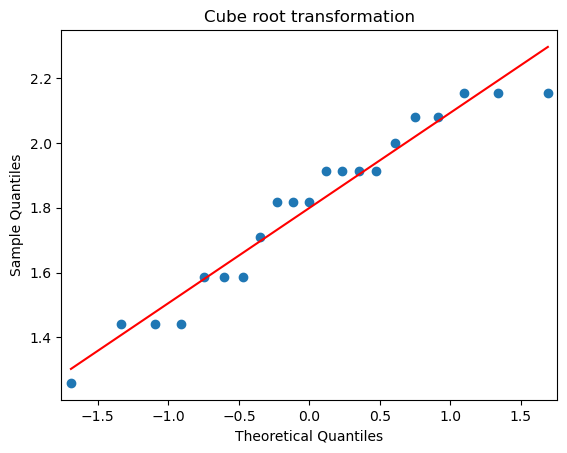

In [19]:
smf.qqplot(df['Sorting Time'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(df['Sorting Time']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(df['Sorting Time']), line = 'r')
plt.title('square root transformation')
smf.qqplot(np.cbrt(df['Sorting Time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

# <font color='red'>Important Note:</font> 
+ We only Perform any data transformation when the data is skewed or not normal

# <font color = 'red'> Step 7

### Fitting a Linear Regression Model 
#### Using Ordinary least squares (OLS) regression 
#### It is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable; the method estimates the relationship by minimizing the sum of the squares in the difference between the observed and predicted values of the dependent variable configured as a straight line

In [20]:
model = sm.ols('Delivery_Time~Sorting_Time', data = df1).fit()

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           3.98e-06
Time:                        22:48:02   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## <font color='red'> As you can notice in the above model 
+ The R-squared and Adjusted R-squared scores are still below 0.85.
+ (It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction)
+ Lets Try some data transformation to check whether these scores can get any higher than this.

### Square Root transformation on data

In [22]:
square_root_model = sm.ols('np.sqrt(Delivery_Time)~np.sqrt(Sorting_Time)', data = df1).fit()
square_root_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(Delivery_Time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Tue, 31 Oct 2023   Prob (F-statistic):           8.48e-07
Time:                            22:48:02   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(Sorting_Time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## <font color='red'> As you can notice in the above model
+ After Square Root transformation on the Data, R-squared and Adjusted R-squared scores have increased but they are still below 0.85 which is a thumb rule we consider for a good model for prediction.
+ Lets Try other data transformation to check whether these scores can get any higher than this.

### Cube Root transformation on Data

In [23]:
cube_root_model = sm.ols('np.cbrt(Delivery_Time)~np.cbrt(Sorting_Time)', data = df1).fit()
cube_root_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.cbrt(Delivery_Time)   R-squared:                       0.744
Model:                                OLS   Adj. R-squared:                  0.731
Method:                     Least Squares   F-statistic:                     55.25
Date:                    Tue, 31 Oct 2023   Prob (F-statistic):           4.90e-07
Time:                            22:48:02   Log-Likelihood:                 13.035
No. Observations:                      21   AIC:                            -22.07
Df Residuals:                          19   BIC:                            -19.98
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(Sorting_Time)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## <font color='red'> As you can notice in the above model
+ After Cueb root transformation on the Data, R-squared and Adjusted R-squared scores have increased but they are still below 0.85 which is a thumb rule we consider for a good model for prediction.
+ Lets Try other data transformation to check whether these scores can get any higher than this.

### Log transformation on Data

In [24]:
log_model = sm.ols('np.log(Delivery_Time)~np.log(Sorting_Time)', data = df1).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Tue, 31 Oct 2023   Prob (F-statistic):           1.60e-07
Time:                           22:48:02   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_Time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## <font color='red'> As you can notice in the above model
+ After log transformation on the Data, This Model has scored the highest R-squared and Adjusted R-squared scores than the previous model
+ Yet both Adjusted R-squared and R-squared scores are still below 0.85 which is a thumb rule we consider for a good model for prediction. 
+ Though it is now close to 0.8 which for a single feature/predictor variable or single independent variable is expected to be low. Hence , we can stop here.

### Model Testing
#### As Y = Beta0 + Beta1*(X)
#### Finding Coefficient Parameters (Beta0 and Beta1 values)

In [25]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

#### Here, (Intercept) Beta0 value = 6.58 & (Sorting Time) Beta1 value = 1.64
#### Hypothesis testing of X variable by finding test_statistics and P_values for Beta1 i.e if (P_value < α=0.05 ; Reject Null)
#### Null Hypothesis as Beta1=0 (No Slope) and Alternate Hypthesis as Beta1≠0 (Some or significant Slope)

In [26]:
print(model.tvalues,'\n',model.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


#### (Intercept) Beta0: tvalue=3.82 , pvalue=0.001147
#### (daily)     Beta1: tvalue=6.38, pvalue=0.000004
#### As (pvalue=0)<(α=0.05); Reject Null hyp. Thus, X(Sorting Time) variable has good slope and variance w.r.t Y(Delivery Time) variable. 
#### R-squared measures the strength of the relationship between your model and the dependent variable on a 0 – 100% scale.
#### Measure goodness-of-fit by finding rsquared values (percentage of variance)

In [27]:
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

#### Determination Coefficient = rsquared value = 0.68 ; very good fit >= 85%

# <font color = 'red'> Step 8

### Residual Analysis

### Test for Normality of Residuals (Q-Q Plot)

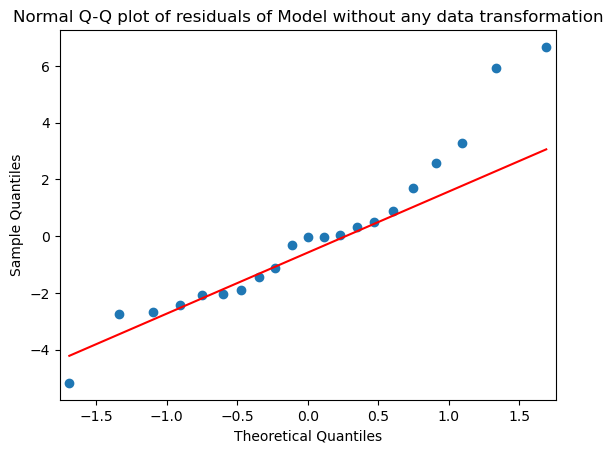

In [28]:
import statsmodels.api as sm
sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
plt.show()

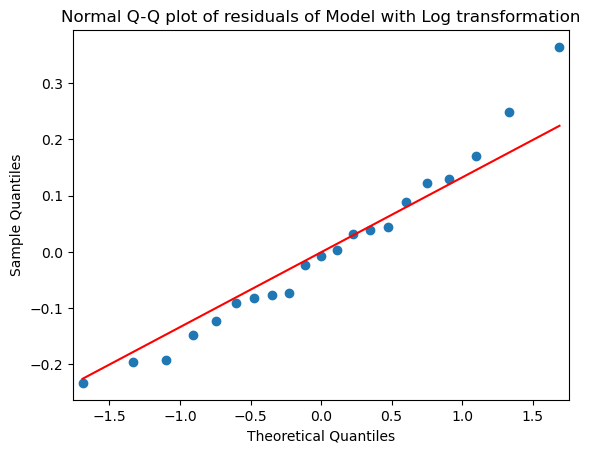

In [29]:
sm.qqplot(log_model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model with Log transformation')
plt.show()

## <font color='red'> As you can notice in the above plots
+ Both The Model have slightly different plots
+ The first model is right skewed and doesn't follow normal distribution
+ The second model after log-transformation follows normal distributon with less skewness than first model

### Residual Plot to check Homoscedasticity or Hetroscedasticity

In [30]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

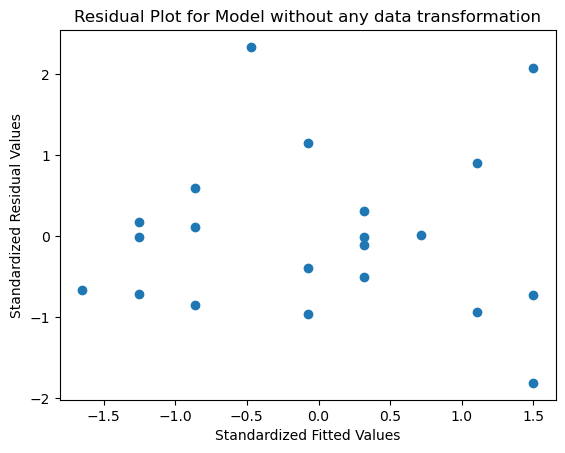

In [31]:
plt.scatter(get_standardized_values(model.fittedvalues), get_standardized_values(model.resid))
plt.title('Residual Plot for Model without any data transformation')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

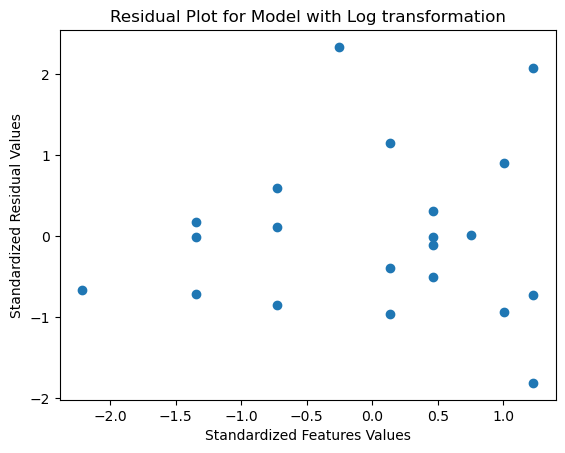

In [32]:
plt.scatter(get_standardized_values(log_model.fittedvalues), get_standardized_values(model.resid))
plt.title('Residual Plot for Model with Log transformation')
plt.xlabel('Standardized Features Values')
plt.ylabel('Standardized Residual Values')
plt.show()

## <font color='red'> As you can notice in the above plots
+ Both The Model have Homoscedasciticity. 
+ The Residual(i.e Residual  = Actual Value - Predicted Value) and the Fitted values do not share any Pattern. 
+ Hence, there is no relation between the Residual and the Fitted Value. It is Randomly distributed

# <font color = 'red'> Step 9

### Model Validation
 

### Comparing different models with respect to their Root Mean Squared Errors
### We will analyze Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) — AKA the average distance (squared to get rid of negative numbers) between the model’s predicted target value and the actual target value.

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
square_root_pred_y =np.square(square_root_model.predict(df1['Sorting_Time']))
cube_root_pred_y =pow(cube_root_model.predict(df1['Sorting_Time']),3)
log_model_pred_y =np.exp(log_model.predict(df1['Sorting_Time']))

In [35]:
square_root_rmse =np.sqrt(mean_squared_error(df1['Delivery_Time'], square_root_pred_y))
cube_root_rmse =np.sqrt(mean_squared_error(df1['Delivery_Time'], cube_root_pred_y))
log__rmse =np.sqrt(mean_squared_error(df1['Delivery_Time'], log_model_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'square_root_model=', square_root_rmse,'\n' 'cube_root_model=', cube_root_rmse,'\n' 'log_model=', log__rmse)

model= 2.934903768890139 
square_root_model= 2.762294279320867 
cube_root_model= 2.7555843098935733 
log_model= 2.745828897614548


In [36]:
data = {'model': np.sqrt(model.mse_resid), 'square_root_model': square_root_rmse, 'cube_root_model': cube_root_rmse, 'log_model' : log__rmse}
min(data, key=data.get)

'log_model'

## <font color='red'>As log_model has the minimum RMSE and highest Adjusted R-squared score. Hence, we are going to use log_model to predict our values 
+ log_model is the model where we did log transformation on both dependent variable as well as on independent variable

# <font color = 'red'> Step 10

###  Predicting values from Model with Log Transformation on the Data

In [37]:
predicted = pd.DataFrame()
predicted['Sorting_Time'] = df1.Sorting_Time
predicted['Delivery_Time'] = df1.Delivery_Time
predicted['Predicted_Delivery_Time'] = pd.DataFrame(np.exp(log_model.predict(predicted.Sorting_Time)))
predicted

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,22.597360
1,4,13.50,13.070123
2,6,19.75,16.653216
3,9,24.00,21.218593
4,10,29.00,22.597360
5,6,15.35,16.653216
6,7,19.00,18.259981
7,3,9.50,11.005911
8,10,17.90,22.597360
9,9,18.75,21.218593


### Predicitng from Original Model without any data transformation

In [38]:
predicted1 = pd.DataFrame()
predicted1['Sorting_Time'] = df1.Sorting_Time
predicted1['Delivery_Time'] = df1.Delivery_Time
predicted1['Predicted_Delivery_Time'] = pd.DataFrame(model.predict(predicted1.Sorting_Time))
predicted1

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913
